# Strojno učenje - PMF

Akademska godina 2020./2021.
[https://web.math.pmf.unizg.hr/nastava/su/](https://web.math.pmf.unizg.hr/nastava/su/)

Matija Piškorec

kernel: Python 3.9

# 5. Učenje bez nadzora

Nenadzirano učenje (engl. unsupervised learning) podrazumijeva učenje bez ciljne značajke. Za više informacija pogledajte stranicu [Clustering](http://scikit-learn.org/stable/modules/clustering.html) iz službene scikit-learn korisničke dokumentacije.

Preduvjeti
--------------

U ovoj vježbi koristit ćemo i [`20newsgroups`](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html#newsgroups) dataset koji se sastoji od 18000 tekstova podjeljenih u 20 kategorija, a koji je zbog veličine dostupan i lokalno u repozitoriju ovih vježbi.

Za ostale datasetove dostupne unutar scikit-learna pogledajte službenu dokumentaciju na [`sklearn.datasets`](http://scikit-learn.org/dev/modules/classes.html#module-sklearn.datasets).

In [20]:
%matplotlib inline
import numpy as np # 1.19.4
import matplotlib.pyplot as plt # 3.3.3
import pandas as pd # 1.1.5

5.1. Grupiranje s algoritmom k-srednjih vrijednosti
-----------------------------------------

U sljedećem primjeru koristit ćemo algoritam k-srednjih vrijednosti (engl. k-means clustering) za grupiranje. Ovaj primjer je preuzet iz [Demonstration of k-means assumptions](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py) iz scikit-learn korisničke dokumentacije. Algoritam k-srednjih vrijednosti pokušava naći centroide grupa $\mu_i$ i potom dodjeliti svaki uzorak $x_j$ jednoj od grupa tako da je suma kvadratnih udaljenost uzoraka od centra pripadajućih grupa minimalna:

$$
\sum_{i=0}^{n}\min_{\mu_j \in C}(\|x_j - \mu_i\|^2)
$$

Za evaluaciju ćemo koristiti normaliziranu uzajamnu informaciju (engl. normalized mutual information, NMI) implementiranu u funkciji [`sklearn.metrics.normalized_mutual_info_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html#sklearn.metrics.normalized_mutual_info_score). Ova mjera je normalizirana od 0 do 1 pri čemu vrijednost 0 označava u potpunosti nezavisno grupiranje dok 1 označava savršeno grupiranje s obzirom na neke unaprijed poznate labele (ovo nije slučaj s nenormaliziranom mjerom [`sklearn.metrics.mutual_info_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mutual_info_score.html#sklearn.metrics.mutual_info_score)).

In [21]:
from sklearn.cluster import KMeans # 0.23.2
from sklearn.datasets import make_blobs
from sklearn.metrics import normalized_mutual_info_score

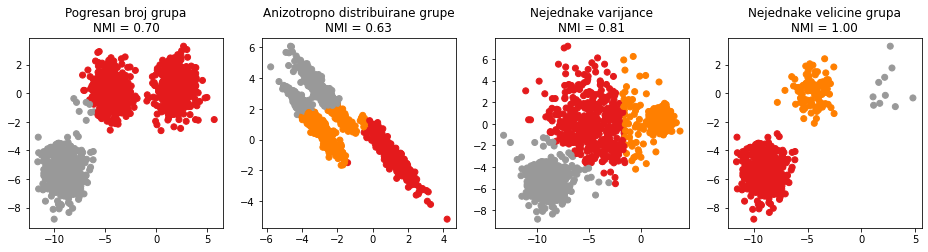

In [22]:
fig, ax = plt.subplots(1, 4, figsize=(16, 3.5))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Pogresan broj grupa
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)
score = normalized_mutual_info_score(y,y_pred,average_method='arithmetic')

ax[0].scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Set1)
ax[0].set(title="Pogresan broj grupa\nNMI = " + '{0:.2f}'.format(score))

# Anizotropno distribuirane grupe
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)
score = normalized_mutual_info_score(y,y_pred,average_method='arithmetic')

ax[1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred, cmap=plt.cm.Set1)
ax[1].set(title="Anizotropno distribuirane grupe\nNMI = " + '{0:.2f}'.format(score))

# Nejednake varijance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)
score = normalized_mutual_info_score(y_varied,y_pred,average_method='arithmetic')

ax[2].scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred, cmap=plt.cm.Set1)
ax[2].set(title="Nejednake varijance\nNMI = " + '{0:.2f}'.format(score))

# Nejednake velicine grupa
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_filtered = np.hstack((y[y == 0][:500], y[y == 1][:100], y[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)
score = normalized_mutual_info_score(y_filtered,y_pred,average_method='arithmetic')

ax[3].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred, cmap=plt.cm.Set1)
ax[3].set(title="Nejednake velicine grupa\nNMI = " + '{0:.2f}'.format(score))

plt.show()

**Vježba 5.1.** Iskoristite neku drugu metodu grupranja u sciki-learnu i usporedite rezultate s onima dobivenima algoritmom k-srednjih vrijednosti. Primjerice, probajte [`sklearn.cluster.SpectralClustering`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering), [`sklearn.cluster.AffinityPropagation`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html#sklearn.cluster.AffinityPropagation) ili [`sklearn.cluster.DBSCAN`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN).

5.2. Hijerarhijsko grupiranje s aglomerativnim grupiranjem
-----------------------------------------

Za hijerarhijsko grupiranje aglomerativnim pristupom (engl. hierarchical agglomerative clustering) koristit ćemo scikit-learn funkciju [`sklearn.cluster.AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering). Aglomerativno grupiranje primjenjuje bottom-up pristup - u početku je svakom primjeru dodijeljena zasebna grupa koje se potom spajaju. Kriterij po kojem se grupe spajaju ovisi o kriteriju povezanosti:

- *Ward* minimizira sumu kvadrata udaljenosti unutar svih grupa, što je slično algoritmu k-srednjih vrijednosti.

- *Maximum* ili *complete linkage* minimizira maksimalnu udaljenost između primjera u paru grupa.

- *Average linkage* minimizira prosječnu udaljenost između svih primjera u paru grupa.

- *Single linkage* minimizira udaljenost između najbližih primjera u paru grupa.

Za više informacije pogledajte službenu scikit-learn dokumentaciju za [2.3.6. Hierarchical clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering).

In [23]:
from sklearn.datasets import make_blobs
from sklearn.metrics import normalized_mutual_info_score
from sklearn.cluster import AgglomerativeClustering

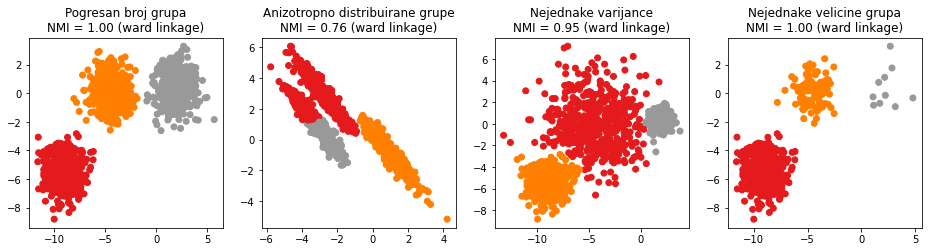

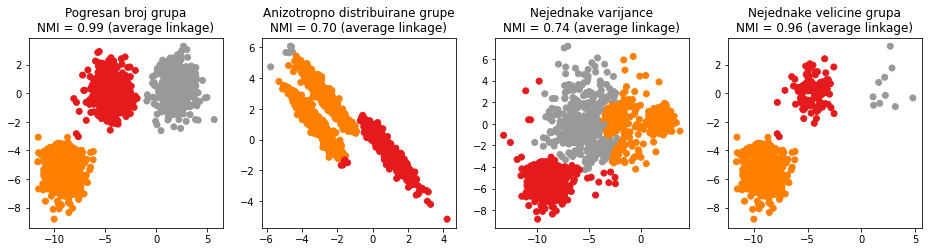

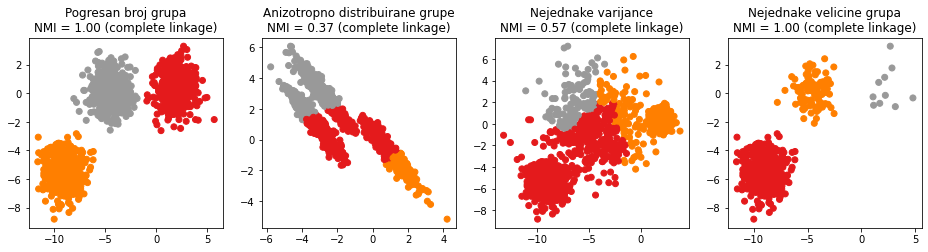

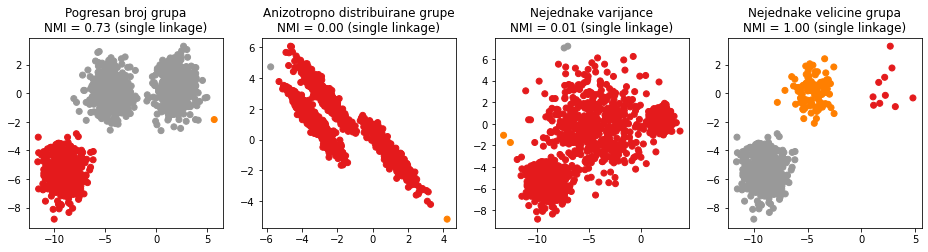

In [24]:
for linkage in ('ward', 'average', 'complete', 'single'):
    
    fig, ax = plt.subplots(1, 4, figsize=(16, 3.5))

    n_samples = 1500
    random_state = 170
    X, y = make_blobs(n_samples=n_samples, random_state=random_state)

    # Pogresan broj grupa
    y_pred = AgglomerativeClustering(linkage=linkage, n_clusters=3).fit_predict(X)
    score = normalized_mutual_info_score(y,y_pred,average_method='arithmetic')

    ax[0].scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Set1)
    ax[0].set(title="Pogresan broj grupa\nNMI = " + '{0:.2f}'.format(score)+" ("+linkage+" linkage)")

    # Anizotropno distribuirane grupe
    transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
    X_aniso = np.dot(X, transformation)
    y_pred = AgglomerativeClustering(linkage=linkage, n_clusters=3).fit_predict(X_aniso)
    score = normalized_mutual_info_score(y,y_pred,average_method='arithmetic')

    ax[1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred, cmap=plt.cm.Set1)
    ax[1].set(title="Anizotropno distribuirane grupe\nNMI = " + '{0:.2f}'.format(score)+" ("+linkage+" linkage)")

    # Nejednake varijance
    X_varied, y_varied = make_blobs(n_samples=n_samples,
                                    cluster_std=[1.0, 2.5, 0.5],
                                    random_state=random_state)
    y_pred = AgglomerativeClustering(linkage=linkage, n_clusters=3).fit_predict(X_varied)
    score = normalized_mutual_info_score(y_varied,y_pred,average_method='arithmetic')

    ax[2].scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred, cmap=plt.cm.Set1)
    ax[2].set(title="Nejednake varijance\nNMI = " + '{0:.2f}'.format(score)+" ("+linkage+" linkage)")

    # Nejednake velicine grupa
    X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
    y_filtered = np.hstack((y[y == 0][:500], y[y == 1][:100], y[y == 2][:10]))
    y_pred = AgglomerativeClustering(linkage=linkage, n_clusters=3).fit_predict(X_filtered)
    score = normalized_mutual_info_score(y_filtered,y_pred,average_method='arithmetic')

    ax[3].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred, cmap=plt.cm.Set1)
    ax[3].set(title="Nejednake velicine grupa\nNMI = " + '{0:.2f}'.format(score)+" ("+linkage+" linkage)")

    plt.show()

5.3. Modeliranje tema s NMF-om
-----------------------------------------

U sljedećem primjeru koristit ćemo ne-negativnu matričnu faktorizaciju (eng. non-negative matrix factorization, NMF) za modeliranje tema u tekstualnim dokumentima. NMF pretpostavlja da su podaci ne-negativni i daje additivne komponente koje se lako interpretiraju, pogotovo u domenama kao što su slike i tekst. U modeliranju tema, gdje je svaki dokument raprezentiran s bag-of-words reprezentacijom, komponente koje daje NMF se interpretiraju kao teme koje dokument pokriva, od kojih svaka daje određenu vjerojatnost za pojavljivanje određenih riječi. Za više detalja pogledajte službenu dokumentaciju ["2.5.6. Non-negative matrix factorization (NMF or NNMF)"](http://scikit-learn.org/stable/modules/decomposition.html#nmf). 

Koristit ćemo [`sklearn.datasets.fetch_20newsgroups`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups) dataset koji se sastoji od tekstova koji pripadaju jednoj od nekoliko različitih tema. Za sličan primjer pogledajte ["Topics extraction with NMF"](http://scikit-learn.org/0.16/auto_examples/applications/topics_extraction_with_nmf.html) u službenoj scikit-learn dokumentaciji.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_20newsgroups

In [26]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'),
                             data_home='../assets/datasets/zip/',
                             download_if_missing=False) # dataset je dostupan lokalno

print('Ucitano ' + str(len(dataset.data)) + ' dokumenata.')

Ucitano 11314 dokumenata.


Kako izgleda prvih nekoliko tekstova, zajedno s temama.

In [27]:
[t.upper()+' => '+s[:300]+'[...]' for s,t in zip(dataset.data[:5],np.take(dataset.target_names,dataset.target[:5]))]

["TALK.POLITICS.MIDEAST => Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one desc[...]",
 "ALT.ATHEISM => \n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap of faith, Jimmy.  Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n\nSorry I can't pity you, Jim.  And I'm sorry that you have these feelings of\ndenial about the faith you need to get by.  O[...]",
 'TALK.POLITICS.MIDEAST => Although I realize that principle is not one of your strongest\npoints, I would still like to know why do do not ask any question\nof this sort about the Arab countries.\n\n   If you want to continue this think tank charade of yours, your\nfixation on Israel must stop.  You might have to 

I sve moguće teme su:

In [28]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Prilikom učitavanja dataseta već smo uklonili zaglavlja i ostatak suvišnog teksta. Iskoristit ćemo [`sklearn.feature_extraction.text.TfidfVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) za stvaranje TF-IDF (term frequency - inverse document frequency) vektora za svaki dokument. U njemu svaki atribut odgovara jednom terminu kojeg pratimo u dokumentima, pri čemu je njegova vrijednost proporcionalna učestalosti termina u danom dokumentu a obrnuto proporcionalna učestalosti termina u svim dokumentima. Tako će termini koji su relativno rijetki nositi veću težinu jer je vjerojatnije da su važni za temu dokumenta. Također ćemo ukloniti riječi koje se pojavljuju samo u jednom dokumentu (`min_df=2`) ili u više od 95% svih dokumenata (`max_df=0.95`), kao i stop riječi koje ne nose puno semantičkog značenja (`stop_words='english'`). Dodatno, odabrat ćemo najučestalijih 1000 termina koji zadovoljavaju ove kriterije (`max_featuers=1000`).

In [29]:
n_samples = 2000
n_features = 1000
n_topics = 10
n_top_words = 15

vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words='english')
tfidf = vectorizer.fit_transform(dataset.data[:n_samples])
tfidf

<2000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 51752 stored elements in Compressed Sparse Row format>

Naš dataset je sad u formu rijetke matrice gdje atributi (stupci) odgovaraju naših 1000 odabranih atributa a primjeri (retci) su pojedinačni dokumenti. Konačno, idemo primjeniti NMF na danoj TF-IDF reprezentaciji koristeći [`sklearn.decomposition.NMF`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html#sklearn.decomposition.NMF).

In [30]:
print('NMF model s ' + str(n_samples) + ' primjera i ' + str(n_features) + ' znacajki.')
nmf = NMF(n_components=n_topics, random_state=1).fit(tfidf)

feature_names = vectorizer.get_feature_names()

for topic_idx, topic in enumerate(nmf.components_):
    print("Tema #%d:" % topic_idx + ' ' + " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words-1:-1]]))

NMF model s 2000 primjera i 1000 znacajki.
Tema #0: just people don think like know say did make really time way ve right sure
Tema #1: windows use using window dos program application os drivers software help screen running ms code
Tema #2: god jesus bible faith does christian christians christ believe life heaven sin lord church religion
Tema #3: thanks know does mail advance hi info interested anybody email like looking help appreciated card
Tema #4: car new 00 bike 10 price space cars power sale good year engine years used
Tema #5: edu soon com send university internet ftp mail mit information article cc pub address hope
Tema #6: file problem files format ftp win space sound read pub available program site help version
Tema #7: game team year games win play season players nhl runs toronto ll flyers division goal
Tema #8: drive drives hard disk card software floppy mac pc apple power computer scsi controller memory
Tema #9: key chip government clipper encryption keys use public law 

**Vježba 5.2.** Iskoristite neku drugu tehniku za redukciju dimenzionalnosti za modeliranje tema na danom datasetu, primjerice dekompoziciju singularnih vrijednosti (SVD) implementiranu u [`sklearn.decomposition.TruncatedSVD`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html), što je poznato kao latentna semantička analiza (engl. latent semantic analysis, LDA), ili PCA implementiranu u [`sklearn.decomposition.PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA), ili bilo koju drugu dekompozicijsku metodu u [`sklearn.decomposition`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition). Usporedite rezultate s NMF-om. Jesu li teme smislene? Napomena: Neke metode, kao što je PCA, rade samo na gustim (engl. dense) matricama, pa ćete prije korištenja morati pretvoriti rijetke matrice u guste s `tfidf.todense()`. TFIDF vektorske reprezentacije koje daje [`sklearn.feature_extraction.text.TfidfVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) su rijetke.

In [31]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

In [32]:
print('Ucenje SVD modela s ' + str(n_samples) + ' uzoraka i ' + str(n_features) + ' znacajki.')
nmf = TruncatedSVD(n_components=n_topics).fit(tfidf)

feature_names = vectorizer.get_feature_names()

for topic_idx, topic in enumerate(nmf.components_):
    print("Tema #%d:" % topic_idx + ' ' + " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

Ucenje SVD modela s 2000 uzoraka i 1000 znacajki.
Tema #0: just like don know people think does good use time new god way ve want
Tema #1: god people think just jesus don bible say law did government life believe christian faith
Tema #2: god does thanks jesus know bible windows faith christian mail file christians edu hi christ
Tema #3: windows use key file government using chip problem keys clipper encryption dos law window used
Tema #4: god game drive windows year 10 new team 00 problem power file games jesus win
Tema #5: edu god 00 key new com government chip 10 sale car computer soon university keys
Tema #6: edu file windows think program game files win soon ftp team window play pub problem
Tema #7: game team games chip key year thanks does looking clipper play win players mail encryption
Tema #8: god key use car keys chip like just good edu game window ll clipper doesn
Tema #9: drive edu think chip drives card mac hard don problem disk need floppy ve game


In [33]:
print('Ucenje PCA modela s ' + str(n_samples) + ' uzoraka i ' + str(n_features) + ' znacajki.')
nmf = PCA(n_components=n_topics).fit(tfidf.todense()) # PCA radi samo na punim matricama!

feature_names = vectorizer.get_feature_names()

for topic_idx, topic in enumerate(nmf.components_):
    print("Tema #%d:" % topic_idx + ' ' + " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

Ucenje PCA modela s 2000 uzoraka i 1000 znacajki.
Tema #0: people god think just don say government law like did jesus bible make way believe
Tema #1: god does jesus bible edu thanks faith christian christians christ mail heaven true lord church
Tema #2: know windows does thanks like don use file help people need problem just using program
Tema #3: thanks know edu mail like don does game interested just advance bike car info email
Tema #4: edu key government chip clipper encryption keys public com people law information enforcement phone clinton
Tema #5: drive car god new power thanks chip drives 00 hard card price key sale speed
Tema #6: edu drive car just soon don god think good com 00 need want power university
Tema #7: drive think people drives don hard card disk software mac floppy thanks apple scsi computer
Tema #8: game god edu key good chip team use games clipper year encryption keys win season
Tema #9: just drive don key doesn chip bike sure got use thought try wrong does clip

**Vježba 5.3.** Iskoristite NMF kao metodu za smanjivanje dimenzionalnosti i evaluirajte prediktivnu moć na nekom od klasifikatora koji smo koristili ranije, te usporedite rezultate dobivene bez primjene NMF-a. Napomena: Pošto je [`20newsgroups`](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html#newsgroups) dataset s više od dvije klase, razmislite o korištenju klasifikatora koji podržava više klasa. Srećom, većina klasifikatora koje smo koristili rade na višeklasnim problemima. Za više detalja pogledajte službenu dokumentaciju ["1.12. Multiclass and multilabel algorithms"](http://scikit-learn.org/stable/modules/multiclass.html).